In [14]:
import os

import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE

In [15]:
def load_files(path):
    df = pd.read_csv(path+'clustering_results.csv')
    
    domain = df['predictions'].values
    
    vec_d = df['vec_d_labels'].values
    vec_y = df['vec_y_labels'].values
    img_locs = df['image_id_labels'].values

    Z = np.load(path + "Z_space.npy")
    model_name = path.split('_')[-1]

    #args = np.loadtxt(path + "arguments.txt", dtype=str, usecols=0)  # , delimiter = '\n')
    #img_locs = np.loadtxt(path + "img_id.txt", dtype=str)
    
    return domain, vec_d, vec_y, img_locs, model_name

In [47]:
ex = "../../model4_fold1/"  # enter the name of the folder where results has been saved
ex = "2022-12-06 14:27:51.855068/"
#ex = '2022-12-16 15:24:59.434370/' # weah dataset
#ex = '2022-12-23 16:29:04.633338/' #2 domains
#ex = '2023-01-04 19:18:09.988880/'
#ex = '2023-01-11 23:50:17.797891/'
#ex = '2023-01-12 09:22:26.923273/' # 4 unconditional
#ex ='2023-01-17 12:50:36.438443/' # 4 clusters cond 1
#ex = '2023-01-17 15:34:58.582799/' # 4 cluster cond 2
ex = '2023-01-17 14:05:45.406071/' # 3 uncoditional
# FINAL exeriments
# ex = '2023-01-19 17:24:17.757174/' # 4 clusters
ex = '2023-01-22 19:51:51.157073/' # 2  clusters
#ex = '2023-01-22 20:27:04.101042/' # 3 clusters 
ex = '2023-07-11 15:52:52.201648_weah_sdcn/'
ex = '2023-07-13 05:48:09.792314_weah_sdcn/'

In [48]:
domain, vec_d, vec_y, img_locs, model_name = load_files(ex)

In [49]:
d = np.array(domain)
#d.shape()
print(np.unique(d))

[1 2 3 4 5 6]


In [50]:
len(domain)

6300

In [51]:
domain

array([3, 3, 3, ..., 5, 5, 5])

In [52]:
def something_per_domain(domain, another_label):
    """
    domain - predicted domain labels 
    another_label - some other label that corresponds to each of the predicted domain (
    assumed that both domain and something have the same img_loc reference order 
    """
    u_something = np.unique(another_label)
    u_domain = np.unique(domain)
    array_counters=[]
    for i in u_something:
        for j in u_domain:
            counter = 0
            for idx in range(0, len(domain)):
                if domain[idx]==j and another_label[idx]==i:
                    counter+=1
            array_counters.append(counter)
    return array_counters
                    

    
    

In [53]:
def img_loc_true_label(img_locs_predicted, df, df_label):
    """
    img_loc_true_label - location of the image (ex. .../../../aperio-001-0_anno_2_reg_4CAH_patchnumber_3.png)
    df -dataframe that compiles img loc reference and other labels corresponding to that image
    df_label - the name of the label in the df that ne would like to retract from the df
    """
    another_label_array = []
    for img in img_locs_predicted:
        img = img.split('/')[-1]     
        row = df.loc[df['path']==img]
        another_label_array.append(row.iloc[0][df_label])
    #print(another_label_array)
    return another_label_array
        
    

In [54]:
import pandas as pd
import os
print(os.listdir('../../../'))
df = pd.read_csv('../../../dset_WEAH.csv')
df.head()

['.bash_logout', '.bash_profile', '.bashrc', '.emacs', '.mozilla', '.xemacs', '.gnupg', '.cache', '.config', '.ssh', '.local', 'perl5', '.pki', '.nv', '.jupyter', '.gitconfig', '.Xauthority', 'png_files', 'old_versions_code', '.ipython', '.ipynb_checkpoints', 'miccai', 'domid_env', 'DomId', 'Anaconda3-2023.03-Windows-x86_64.exe', 'Anaconda3-2023.03-Linux-x86_64.sh', 'anaconda3', '.conda', '.condarc', 'HER2', '.viminfo', '.python_history', 'histocartography__', 'graph_wsi.ipynb', 'scdn', '.lesshst', 'Aperio_dataset_v10.csv', 'dset_WEAH.csv', 'data_Outside', 'graph_bs_1.png', '.bash_history']


Unnamed: 0                                              path  subject  \
0           0    aperio-001-0_anno_2_reg_1CAH_patchnumber_1.png        0   
1           1    aperio-001-0_anno_2_reg_1CAH_patchnumber_0.png        0   
2           2  aperio-001-0_anno_2_reg_1CAH_patchnumber_100.png        0   
3           3   aperio-001-0_anno_2_reg_1CAH_patchnumber_10.png        0   
4           4  aperio-001-0_anno_2_reg_1CAH_patchnumber_101.png        0   

  region  ann  resp   age   BMI  CAH  
0   1CAH    2     1  39.0  37.3    1  
1   1CAH    2     1  39.0  37.3    1  
2   1CAH    2     1  39.0  37.3    1  
3   1CAH    2     1  39.0  37.3    1  
4   1CAH    2     1  39.0  37.3    1

In [55]:
# carc_label =[]
# for i in df['path']:
#     if i.split('_')[4][1:]=='CAH':
#         carc_label.append(1)
#     else: 
#         carc_label.append(0)
    
# df['CAH']=carc_label

In [56]:
df

Unnamed: 0                                              path  subject  \
0               0    aperio-001-0_anno_2_reg_1CAH_patchnumber_1.png        0   
1               1    aperio-001-0_anno_2_reg_1CAH_patchnumber_0.png        0   
2               2  aperio-001-0_anno_2_reg_1CAH_patchnumber_100.png        0   
3               3   aperio-001-0_anno_2_reg_1CAH_patchnumber_10.png        0   
4               4  aperio-001-0_anno_2_reg_1CAH_patchnumber_101.png        0   
...           ...                                               ...      ...   
17157       17157  aperio-036-0_anno_2_reg_2CAH_patchnumber_298.png       19   
17158       17158  aperio-036-0_anno_2_reg_2CAH_patchnumber_299.png       19   
17159       17159    aperio-036-0_anno_2_reg_3CAH_patchnumber_0.png       19   
17160       17160    aperio-036-0_anno_2_reg_3CAH_patchnumber_1.png       19   
17161       17161    aperio-036-0_anno_2_reg_3CAH_patchnumber_2.png       19   

      region  ann  resp   age   BMI  CAH  
0       1CAH    2     1  39.0  37.3    1  
1       1CAH    2     1  39.0  37.3    1  
2       1CAH    2     1  39.0  37.3    1  
3       1CAH    2     1  39.0  37.3    1  
4       1CAH    2     1  39.0  37.3    1  
...      ...  ...   ...   ...   ...  ...  
17157   2CAH    2     1  50.0  32.5    1  
17158   2CAH    2     1  50.0  32.5    1  
17159   3CAH    2     1  50.0  32.5    1  
17160   3CAH    2     1  50.0  32.5    1  
17161   3CAH    2     1  50.0  32.5    1  

[17162 rows x 9 columns]

In [57]:
# df.to_csv('../../dset_WEAH1.csv', index=False)

In [58]:
def apply_threshold(u_something, narray, threshold, n_domains):
    '''
    u_something - unique labels (ex [20, 40, 50])
    narray - grouped array of counts of unique labels per predicted domain 
    (ex. [1, 2,3][4,5,6], which would correspond to in predicted domain 1 there are 1 -20, 2-40, 3-50)
    threshold - array of thresholds that you would to seperate u_something in, max should be included into this array as well
    n_domains - number of predicted domains (same are narray.shape[0])
    '''
    dictionary = dict(zip(u_something, zip(*narray)))
    
    new_dictionary = dict(zip(threshold, ([0]*n_domains*len(threshold))))

    start = 0 
    for j in range(0, len(new_dictionary)):

        finish = list(new_dictionary.keys())[j]
        
        for i, k in dictionary.items():
   
            if i>start and i<finish:
            
                new_dictionary[finish]=np.add(new_dictionary[finish],k)
        start=finish

    return new_dictionary

        
                
    

In [59]:
def plot_something_per_domain(domain, another_label, counts, fs,colors, legend = False, thres = None):
    """
    domain - predicted domain labels
    another_label - another label aassociated with each predicted domain (should be same shape as domain)
    counts - countes of each another label in each of the predicted domain (see something_per_domain function)
    fs - font size
    colors - colors of each segment on the bargraph
    legend - legend of unique another lables
    thres - if thresholding of another label is required then should be shpecifies (also see apply_threshold function)
    
    """
    u_domains = np.unique(domain)
    N = len(u_domains)
    
    u_another_label = np.unique(another_label)
    print('unique labels', u_another_label)
    counts = np.array(counts)
    narray = np.array_split(counts, N)

    if thres:
        u_another_label_dic = apply_threshold(u_another_label, narray, thres, N)
        print(u_another_label_dic.values())
        u_another_label = list(u_another_label_dic.keys())
        narray = list(u_another_label_dic.values())
        narray = np.transpose(narray)

    print(narray)
    print(len(u_domains), len(u_another_label))
    plt.figure()
    for i in range(0, len(u_domains)):
        for jj in range(0,len(u_another_label)):
            
            if jj>0:
                bottom = np.sum(narray[i][:jj])/np.sum(narray[i])
            else:
                bottom = 0
            print(i, narray[i][jj])
            plt.bar(i, narray[i][jj]/np.sum(narray[i]), bottom = bottom, color = colors[jj])
    x = np.linspace(0, N-1, N)
    x_ticks = u_domains
    plt.ylabel("Proportion", fontsize=fs)
    plt.xticks(x, x_ticks, fontsize=fs)
    plt.xlabel("Cluster", fontsize=fs)
    plt.ylim(0, 1.025)
    if legend:
        plt.legend(legend)
    else:
        plt.legend(u_another_label)
    plt.show()
    

    #return 
        
    
    
    

In [60]:
def plot_something_per_domain_counts(domain, another_label, counts, fs,colors, legend = False, thres = None):
    """
    domain - predicted domain labels
    another_label - another label aassociated with each predicted domain (should be same shape as domain)
    counts - countes of each another label in each of the predicted domain (see something_per_domain function)
    fs - font size
    colors - colors of each segment on the bargraph
    legend - legend of unique another lables
    thres - if thresholding of another label is required then should be shpecifies (also see apply_threshold function)
    
    """
    u_domains = np.unique(domain)
    N = len(u_domains)
    
    u_another_label = np.unique(another_label)
    print('unique labels', u_another_label)
    counts = np.array(counts)
    narray = np.array_split(counts, N)

    if thres:
        u_another_label_dic = apply_threshold(u_another_label, narray, thres, N)
        print(u_another_label_dic.values())
        u_another_label = list(u_another_label_dic.keys())
        narray = list(u_another_label_dic.values())
        narray = np.transpose(narray)

    print(narray)
    print(len(u_domains), len(u_another_label))
    plt.figure()
    for i in range(0, len(u_domains)):
        for jj in range(0,len(u_another_label)):
            
            if jj>0:
                bottom = np.sum(narray[i][:jj])
            else:
                bottom = 0
            print(i, narray[i][jj])
            plt.bar(i, narray[i][jj], bottom = bottom, color = colors[jj])
    x = np.linspace(0, N-1, N)
    x_ticks = u_domains
    plt.ylabel("Proportion", fontsize=fs)
    plt.xticks(x, x_ticks, fontsize=fs)
    plt.xlabel("Cluster", fontsize=fs)
   
    if legend:
        plt.legend(legend)
    else:
        plt.legend(u_another_label)
    plt.show()

In [61]:

resp_label = img_loc_true_label(img_locs, df, 'resp')

In [62]:
true_responders_per_domain= something_per_domain(domain, resp_label)



unique labels [0 1]
[array([  2, 728]), array([504, 276]), array([1137,   53]), array([ 16, 241]), array([1465,  263]), array([1530,   85])]
6 2
0 2
0 728
1 504
1 276
2 1137
2 53
3 16
3 241
4 1465
4 263
5 1530
5 85


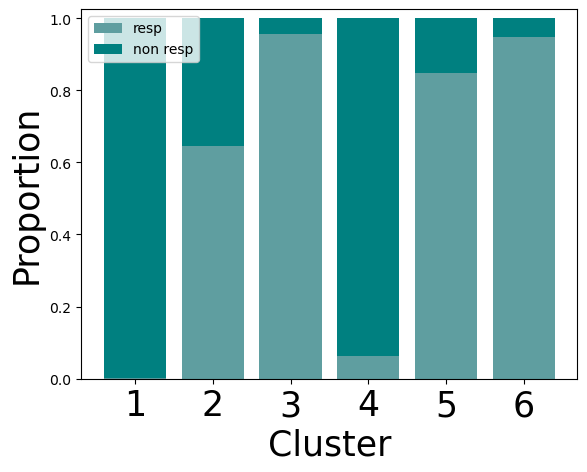

In [63]:
plot_something_per_domain(domain, resp_label, true_responders_per_domain, 25, ['cadetblue', 'teal'], legend = ['resp', 'non resp'])

In [64]:
x = resp_label

unique labels [0 1]
[array([  2, 728]), array([504, 276]), array([1137,   53]), array([ 16, 241]), array([1465,  263]), array([1530,   85])]
6 2
0 2
0 728
1 504
1 276
2 1137
2 53
3 16
3 241
4 1465
4 263
5 1530
5 85


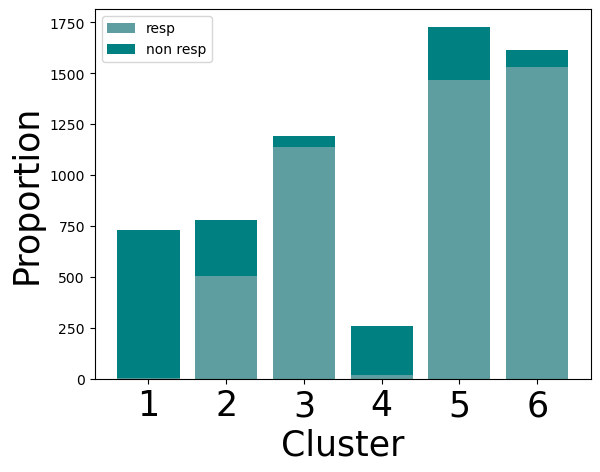

In [65]:
plot_something_per_domain_counts(domain, resp_label, true_responders_per_domain, 25, ['cadetblue', 'teal'], legend = ['resp', 'non resp'])

In [66]:
# resp_label = img_loc_true_label(img_locs, df, 'age')

# age = img_loc_true_label(img_locs, df, 'age')
# true_responders_per_domain= something_per_domain(domain, resp_label)
# plot_something_per_domain(domain, resp_label, true_responders_per_domain, 25, ['cadetblue', 'teal'], ['age under 30', 'age above 30'], [30, 200])

In [67]:
# resp_label = img_loc_true_label(img_locs, df, 'BMI')
# bmi = img_loc_true_label(img_locs, df, 'BMI')
# true_responders_per_domain= something_per_domain(domain, resp_label)
# plot_something_per_domain(domain, resp_label, true_responders_per_domain, 25, ['cadetblue', 'teal'], ['BMI under 25', 'BMI above 25'], [25, 100])

unique labels [1]
[array([18]), array([969]), array([1969]), array([539]), array([2667]), array([138])]
6 1
0 18
1 969
2 1969
3 539
4 2667
5 138


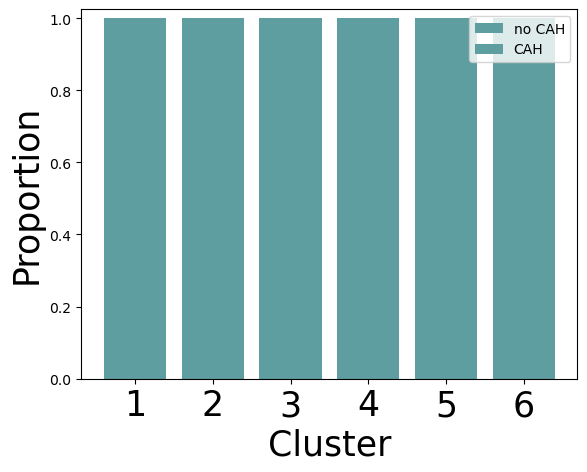

In [68]:
resp_label = img_loc_true_label(img_locs, df, 'CAH')
true_responders_per_domain= something_per_domain(domain, resp_label)
plot_something_per_domain(domain, resp_label, true_responders_per_domain, 25, ['cadetblue', 'teal'], legend = ['no CAH', 'CAH'])


unique labels [1]
[array([18]), array([969]), array([1969]), array([539]), array([2667]), array([138])]
6 1
0 18
1 969
2 1969
3 539
4 2667
5 138


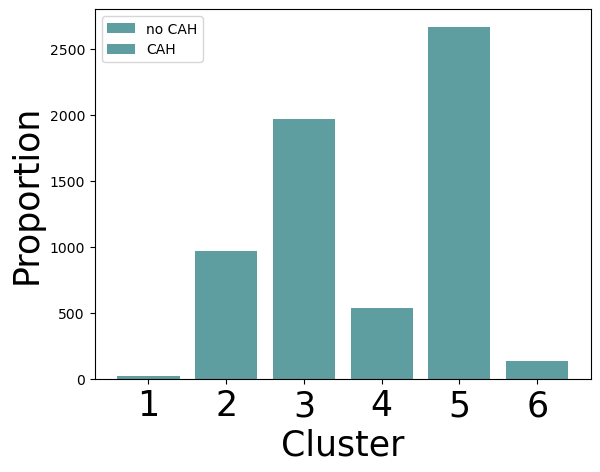

In [69]:
plot_something_per_domain_counts(domain, resp_label, true_responders_per_domain, 25, ['cadetblue', 'teal'], legend = ['no CAH', 'CAH'])

In [97]:

bubble_df = pd.DataFrame(list(zip(domain[:-1], age, bmi)),
               columns =['domain', 'age', 'bmi'])

In [98]:
bubble_df

domain   age    bmi
0         3.0  36.0  70.20
1         1.0  59.0  52.00
2         3.0  56.0  54.41
3         1.0  61.0  85.06
4         1.0  31.0  43.60
...       ...   ...    ...
26195     1.0  50.0  63.00
26196     2.0  59.0  52.00
26197     2.0  58.0  45.29
26198     3.0  34.0  43.00
26199     4.0  57.0  63.00

[26200 rows x 3 columns]

<AxesSubplot:xlabel='age', ylabel='bmi'>

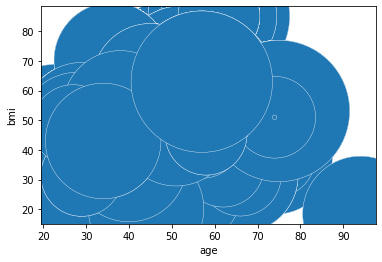

In [99]:
sns.scatterplot(data=bubble_df, x="age", y="bmi", size="domain", legend=False, sizes=(20, 20000))

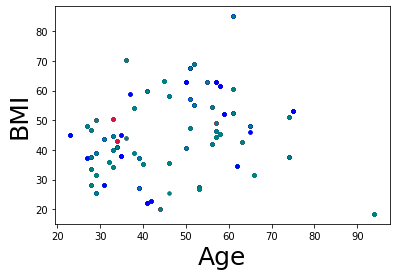

In [34]:
for i in range(0, 2000):
    if domain[i]==1:
        d_color = 'blue'
    if domain[i]==2:
        d_color = 'teal'
        
    if domain[i]==3:
        d_color = 'crimson'
        
    if domain[i]==4:
        d_color = 'red'
    plt.scatter(age[i], bmi[i], color = d_color, s = 10, alpha = 1)
    plt.xlabel('Age', fontsize = 25)
    plt.ylabel('BMI', fontsize = 25)
    
    

plt.show()

In [117]:
domain

array([3., 1., 3., ..., 3., 4., 0.])

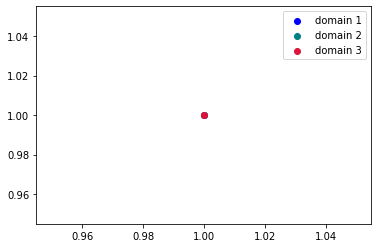

In [35]:
for i in range(1, 4):
    if i==1:
        d_color = 'blue'
    if i==2:
        d_color = 'teal'
        
    if i==3:
        d_color = 'crimson'
        
    if i==4:
        d_color = 'red'
    plt.scatter(1, 1, color = d_color)
    plt.legend(['domain 1', 'domain 2', 'domain 3', 'domain 4'])
plt.show()

In [28]:
y = resp_label

In [29]:
R = np.corrcoef(x, y)

<AxesSubplot:>

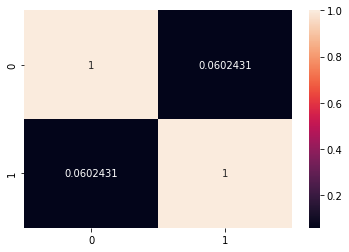

In [30]:
import seaborn as sns
sns.heatmap(R, annot=True, fmt='g')

In [31]:
from scipy import stats
stats.pearsonr(x, y)

(0.06024312989099717, 1.6781315684425919e-22)

In [32]:
df = pd.read_csv('../../dset_WEAH.csv')

In [33]:
df_original = pd.read_csv('../../Aperio_dataset_v10.csv')

In [34]:
df_original.head()

Patient ID Initial dx Comments about initial dx slide  \
0           1        CAH                             NaN   
1           2        CAH                             NaN   
2           4        CAH                             NaN   
3           5        CAH                             NaN   
4           6        CAH                             NaN   

  Filename of initial Aperio slide Filename of initial 3D Histech slide  \
0                 APERIO-001-0.SVS                    3DHISTECH-1-0.SVS   
1                 APERIO-002-0.SVS                    3DHISTECH-2-0.SVS   
2                 APERIO-004-0.SVS                    3DHISTECH-4-0.SVS   
3                 APERIO-005-0.SVS                    3DHISTECH-5-0.SVS   
4                 APERIO-006-0.SVS                    3DHISTECH-6-0.SVS   

  Responder  Age at dx    BMI BMICAT   Race  ... Benign_Length  \
0         Y       39.0  37.30  M_BMI    WNH  ...           0.0   
1         Y       28.0  28.20  L_BMI     WH  ...           0.0   
2         N       28.0  46.70  H_BMI    WNH  ...           0.0   
3         Y       32.0  36.00  M_BMI    WNH  ...      157995.2   
4         Y       35.0  27.78  L_BMI  ASIAN  ...       72512.7   

  CAH_Length_Micron Carcinoma_Length_Micron Benign_Length_Micron  \
0           14673.3                     0.0                  0.0   
1           13430.6                  3530.1                  0.0   
2           11015.0                  9589.0                  0.0   
3           16255.9                  5999.2              40020.2   
4           14652.0                     0.0              18367.6   

  SVS Num Scenes SVS Scene Name               SVS Rect  SVS Num Channels  \
0              1          IMAGE  (0, 0, 157368, 84574)                 3   
1              1          IMAGE  (0, 0, 123503, 38380)                 3   
2              1          IMAGE  (0, 0, 101592, 92341)                 3   
3              1          IMAGE  (0, 0, 135456, 75813)                 3   
4              1          IMAGE  (0, 0, 125495, 87592)                 3   

           SVS Resolution                                       SVS MetaData  
0  (2.533E-07, 2.533E-07)  ['APERIO IMAGE LIBRARY V12.0.15 \R\N160528X846...  
1  (2.533E-07, 2.533E-07)  ['APERIO IMAGE LIBRARY V12.0.15 \R\N125984X384...  
2  (2.533E-07, 2.533E-07)  ['APERIO IMAGE LIBRARY V12.0.15 \R\N103632X924...  
3  (2.533E-07, 2.533E-07)  ['APERIO IMAGE LIBRARY V12.0.15 \R\N138176X759...  
4  (2.533E-07, 2.533E-07)  ['APERIO IMAGE LIBRARY V12.0.15 \R\N128016X876...  

[5 rows x 46 columns]

In [35]:
img_locs[0]


'../../png_files/Training/aperio-059-0/aperio-059-0_anno_2_reg_4CAH_patchnumber_12.png'

In [36]:
counter = 0
num_cah  = []
area_cah = []
for img in img_locs:
    img_name = img.split('/')[-1][:12]+'.svs'
    img_name = img_name.upper()

    row = df_original.loc[df_original['Filename of initial Aperio slide']==img_name]
    area_cah.append(int(row['Total CAH Area']))
    num_cah.append(int(row['Num CAH']))
    

    

In [37]:
d1= []
d2 =[]
d3 = []
d4 = []
for i in range(0, len(domain)):
    if domain[i] ==1:
        d1.append(area_cah[i])
    if domain[i] ==2:
        d2.append(area_cah[i])
    if domain[i] ==3:
        d3.append(area_cah[i])
    if domain[i] ==4:
        d4.append(area_cah[i])
        

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5ed8ae2978>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5ed8ae2f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5ed8ae2710>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5ed8af2518>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5ed8af27f0>,
 'means': []}

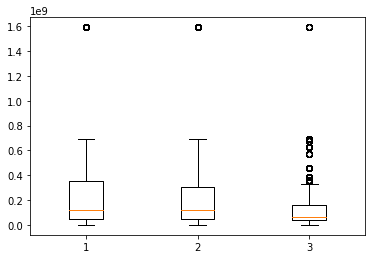

In [38]:
plt.boxplot([d1, d2, d3])


In [39]:
d1= []
d2 =[]
d3 = []
d4 = []
for i in range(0, len(domain)):
    if domain[i] ==1:
        d1.append(num_cah[i])
    if domain[i] ==2:
        d2.append(num_cah[i])
    if domain[i] ==3:
        d3.append(num_cah[i])
    if domain[i] ==4:
        d4.append(num_cah[i])
        

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5ed8a50278>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5ed8a50828>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5ed8a77f60>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5ed8a50dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5ed8a100f0>,
 'means': []}

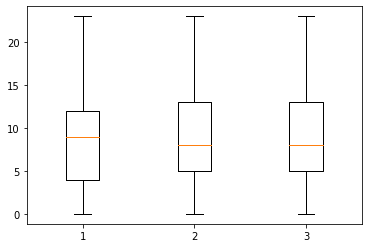

In [40]:
plt.boxplot([d1, d2, d3])


In [41]:
R1, p = stats.pearsonr(x, domain)
R2, p = stats.pearsonr(y, domain)




ValueError: x and y must have the same length.

In [ ]:
plt.figure()
plt.bar(0, R1)
plt.bar(1, R2)
plt.xticks([0, 1], ['Resp', 'CAH'])
plt.ylabel('R value to domain')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(x, y)

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g')


In [ ]:
# arguments = [str(args.aname), str(args.model), str(args.prior), str(args.zd_dim), str(args.te_d), str(args.tr_d), str(args.L), str
print(
    "Name of the exeriment: ",
    args[0],
    "\n",
    "Model: ",
    args[1],
    "\n",
    "Prior dist:",
    args[2],
    "\n",
    "Z dim: ",
    args[3],
    "\n",
    "Learning rate: ",
    args[7],
)

In [90]:
# Seperate predicted domains by numbers. All predicted 1s are in d1, etc....
d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
d6 = []
for i in range(len(domain)):

    if domain[i] == 1:
        d1.append(img_locs[i])
    if domain[i] == 2:
        d2.append(img_locs[i])
    if domain[i] == 3:
        d3.append(img_locs[i])
    if domain[i] == 4:
        d4.append(img_locs[i])
    if domain[i] == 5:
        d5.append(img_locs[i])
    if domain[i] == 6:
        d6.append(img_locs[i])

In [91]:
#import cv2
import torchvision

In [92]:
# import matplotlib.image as mpimg
# img = mpimg.imread
def vizualize_images_per_domain(d, num, N, base_path="../"):
    plt.figure(figsize=(30, 15))
    for j in range(1, N):
        d_path = d[j] if d[j].startswith("/") else base_path + d[j]
        img = torchvision.io.read_image(d_path)
        plt.subplot(1, N, j)
        plt.imshow(img.permute(1, 2, 0))
        name = d[j].split("/")[-1].split('-')
        print(name)
        #title = "responder" +name[2].split('_')[2]
        #plt.title(title, fontsize=50)
        if j == 1:
            plt.ylabel("Domain " + str(num), fontsize=15, fontweight="bold")
    plt.show()

['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_16.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_165.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_170.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_208.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_221.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_246.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_251.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_261.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_291.png']


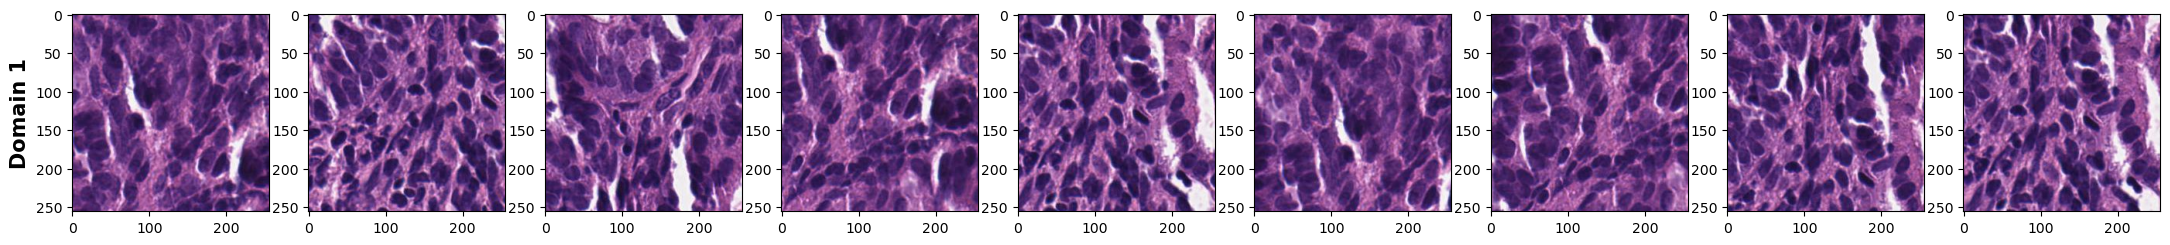

In [93]:
vizualize_images_per_domain(d1, 1, 10)

['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_107.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_111.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_113.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_131.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_132.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_135.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_143.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_148.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_160.png']


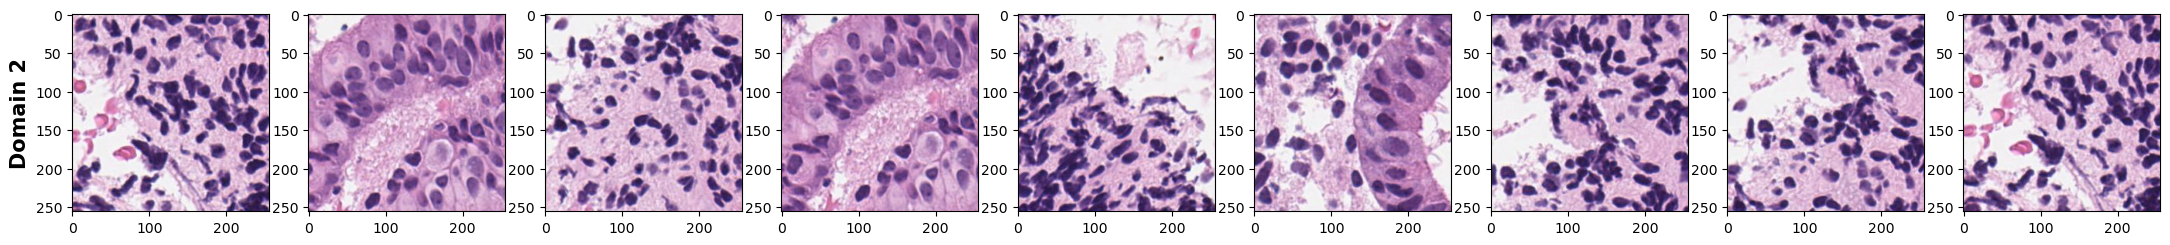

In [94]:

vizualize_images_per_domain(d2, 2, 10)

['aperio', '001', '0_anno_2_reg_1CAH_patchnumber_0.png']
['aperio', '001', '0_anno_2_reg_1CAH_patchnumber_100.png']
['aperio', '001', '0_anno_2_reg_1CAH_patchnumber_10.png']
['aperio', '001', '0_anno_2_reg_1CAH_patchnumber_101.png']
['aperio', '001', '0_anno_2_reg_1CAH_patchnumber_102.png']
['aperio', '001', '0_anno_2_reg_1CAH_patchnumber_103.png']
['aperio', '001', '0_anno_2_reg_1CAH_patchnumber_104.png']
['aperio', '001', '0_anno_2_reg_1CAH_patchnumber_105.png']
['aperio', '001', '0_anno_2_reg_1CAH_patchnumber_106.png']


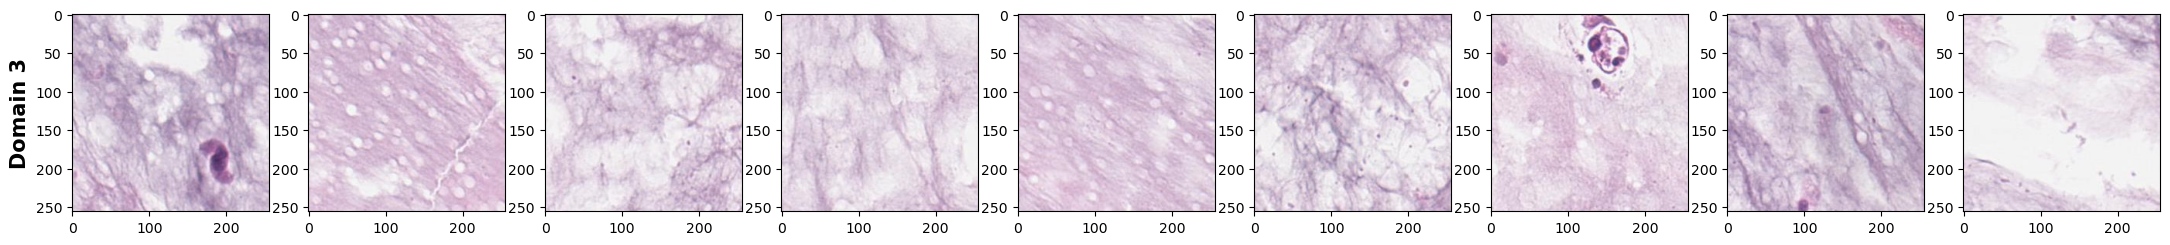

In [95]:

vizualize_images_per_domain(d3, 3, 10)
# vizualize_images_per_domain(d4, 4, 5)

['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_121.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_133.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_137.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_14.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_17.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_170.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_182.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_190.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_194.png']


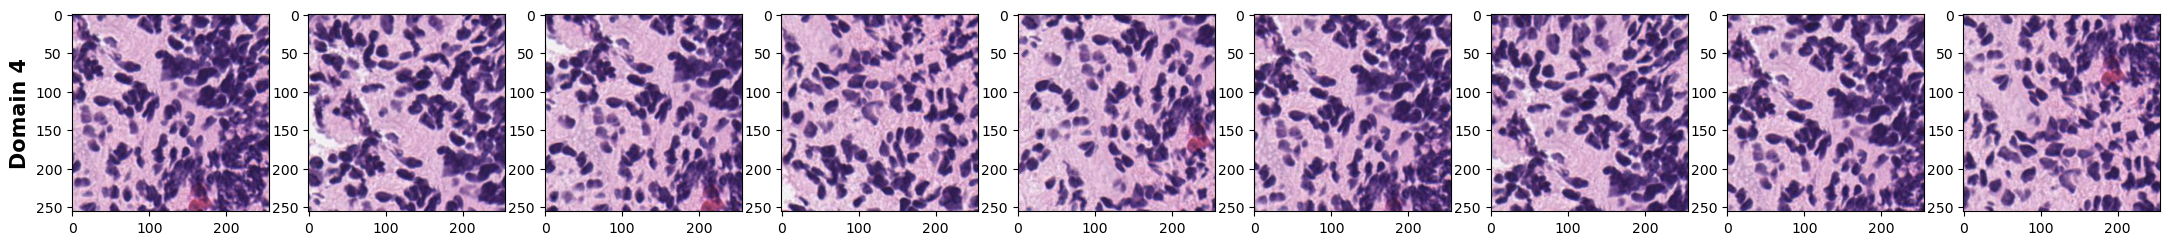

In [96]:
vizualize_images_per_domain(d4, 4, 10)

['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_105.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_108.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_11.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_110.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_112.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_117.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_120.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_124.png']
['aperio', '001', '0_anno_2_reg_3CAH_patchnumber_125.png']


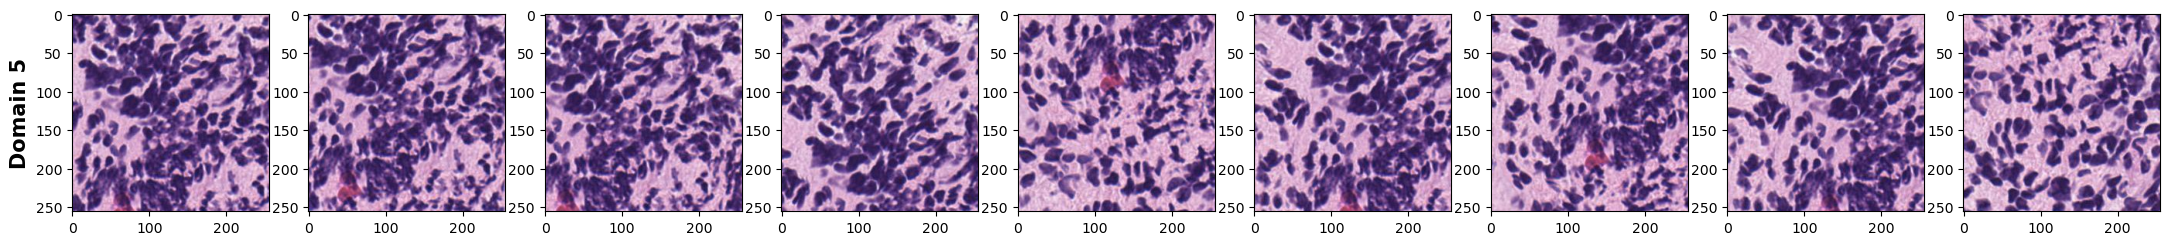

In [97]:
vizualize_images_per_domain(d5, 5, 10)

['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_146.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_150.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_226.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_238.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_243.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_275.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_52.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_53.png']
['aperio', '002', '0_anno_2_reg_7CAH_patchnumber_73.png']


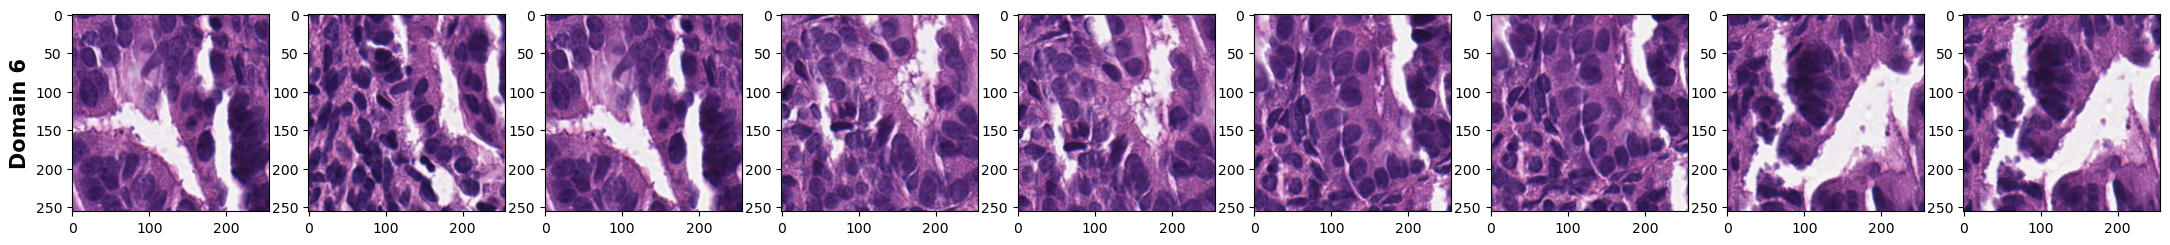

In [98]:
vizualize_images_per_domain(d6, 6, 10)

# Scores Analysis 

In [14]:
def mean_scores_per_experiment(scores, img_locs):
    """
    Parser to get mean scores per image from the cvs file.
    The name of the images in the folders are slightly different from the names in the csv file.

    """

    M = []

    for prediction in img_locs:
        try:
            prediction = str(
                prediction.split("/")[-1]
            )  # depending if the path is full or not, take the img name only
        except:
            "not full path"

        if "s" in prediction:

            N = len(prediction) - 4 - 5
            # print(N, prediction[:N])
            # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
            mean_score = scores.loc[
                scores["file name"].str.contains(prediction[:N])
            ].mean(axis=1)
        if "S" in prediction:

            N = len(prediction) - 4 - 5
            # print(N, prediction[:N])
            # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
            mean_score = scores.loc[
                scores["file name"].str.contains(prediction[:N])
            ].mean(axis=1)
        else:
            N = len(prediction) - 6
            # print('secod case', N, prediction[:N])
            # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
            mean_score = scores.loc[
                scores["file name"].str.contains(prediction[:N])
            ].mean(axis=1)
            # print(mean_score)
        mean_score = float(mean_score)
        # print(mean_score)
        M.append(mean_score)
    return M

In [15]:
def box_plot_per_domain(domain, M, fs, c, title, up, true_ex=False):
    """
    Box plot for median scores
    domain - predicted domain
    M - corresponding mean scores
    c - color fill for the box plot
    title - title of the experiment
    up - vertical displacement of the text
    true_ex  - if ground truth values (not domain, but true labels are inputted)

    """
    data1 = []
    data2 = []
    data3 = []
    # data4 = []

    for i in range(len(domain)):
        if domain[i] == 1:
            data1.append(M[i])
        if domain[i] == 2:
            data2.append(M[i])
        if domain[i] == 3:
            data3.append(M[i])
    #         if domain[i] ==4:
    #             data4.append(M[i])

    data = [data1, data2, data3]
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor=c, color=c))

    ax.text(
        0.85,
        np.mean(data[0]) + up,
        str(np.mean(data[0]))[:5],
        color="black",
        fontsize=fs,
    )
    ax.text(
        1.85,
        np.mean(data[1]) + up,
        str(np.mean(data[1]))[:5],
        color="black",
        fontsize=fs,
    )
    ax.text(
        2.85,
        np.mean(data[2]) + up,
        str(np.mean(data[2]))[:5],
        color="black",
        fontsize=fs,
    )

    plt.xlabel("Domain", fontsize=fs)
    plt.ylabel("HER2/new Scores", fontsize=fs)
    plt.title("Conditional VaDE: " + title, fontsize=fs)
    plt.xticks(fontsize=fs, weight="bold")
    plt.yticks(fontsize=fs - 5)
    if true_ex == True:
        plt.xticks([1, 2, 3], ["FD", "H", "ND"], fontsize=fs)
        plt.title("Original Dataset:" + title, fontsize=fs)
    plt.show()

In [16]:
import pandas as pd

base_path = "../HER2/"
# base_path = "/your/data/location"
scores = pd.read_csv(
    os.path.join(base_path, "truthfile_002.csv"),
    names=["num", "file name", "s1", "s2", "s3", "s4", "s5", "s6", "s_7"],
)

In [17]:
ex1 = "2022-11-01 14:11:16.259751/"  # 3 clusters - 1 fold
ex2 = "2022-11-02 17:30:13.132561/"  # 3 clusters 2 fold

ex1 = "2022-12-06 15:31:29.258003/"
ex2 = "2022-12-06 22:08:14.170419/"

In [18]:
_, _, _, _, domain1, *_, img_locs1 = load_files(ex1)

In [19]:
_, _, _, _, domain2, *_, img_locs2 = load_files(ex2)

/tmp/ipykernel_2979877/2250746413.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_2979877/2250746413.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_2979877/2250746413.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[


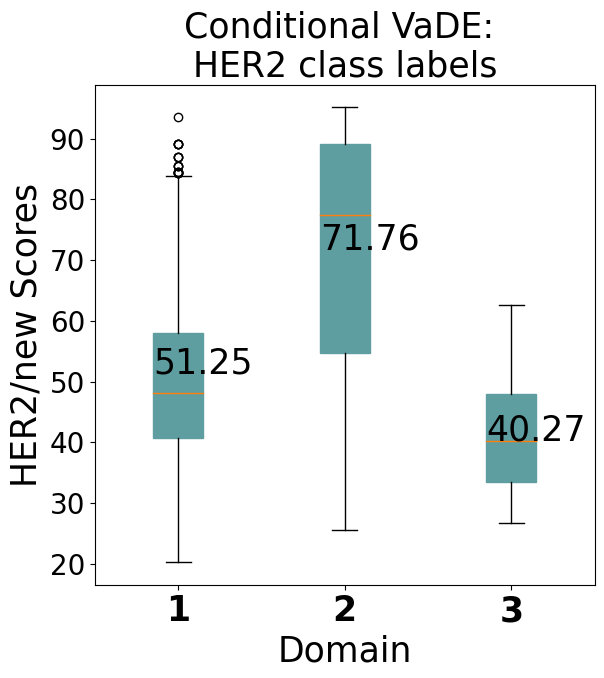

/tmp/ipykernel_2979877/2250746413.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_2979877/2250746413.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_2979877/2250746413.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[


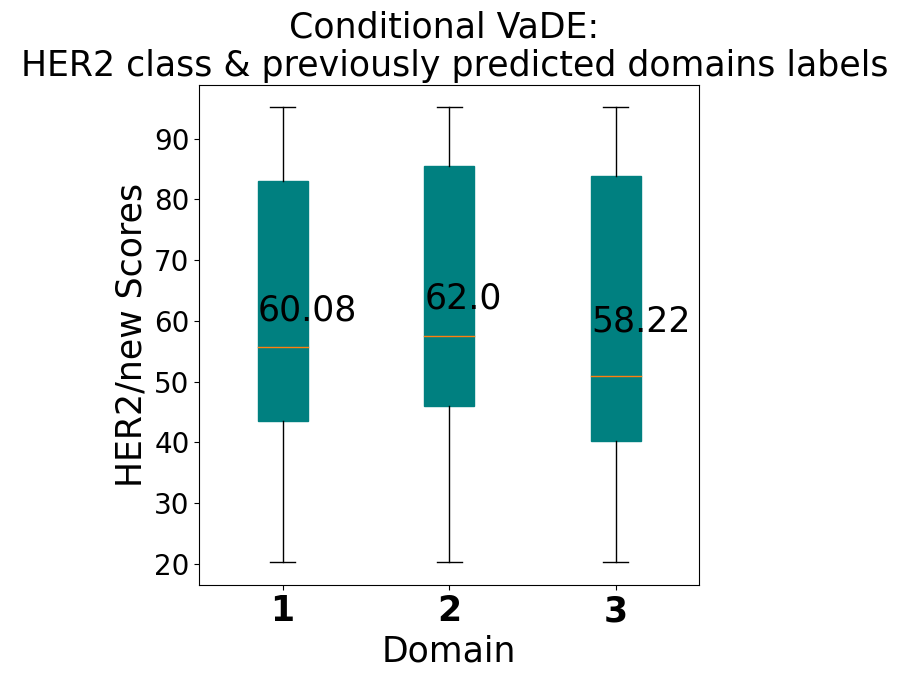

In [20]:
M1 = mean_scores_per_experiment(scores, img_locs1)
box_plot_per_domain(domain1, M1, 25, "cadetblue", "\nHER2 class labels", False)

M2 = mean_scores_per_experiment(scores, img_locs2)
box_plot_per_domain(
    domain1,
    M2,
    25,
    "teal",
    "\n HER2 class & previously predicted domains labels",
    False,
)

/tmp/ipykernel_2979877/2250746413.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_2979877/2250746413.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_2979877/2250746413.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[


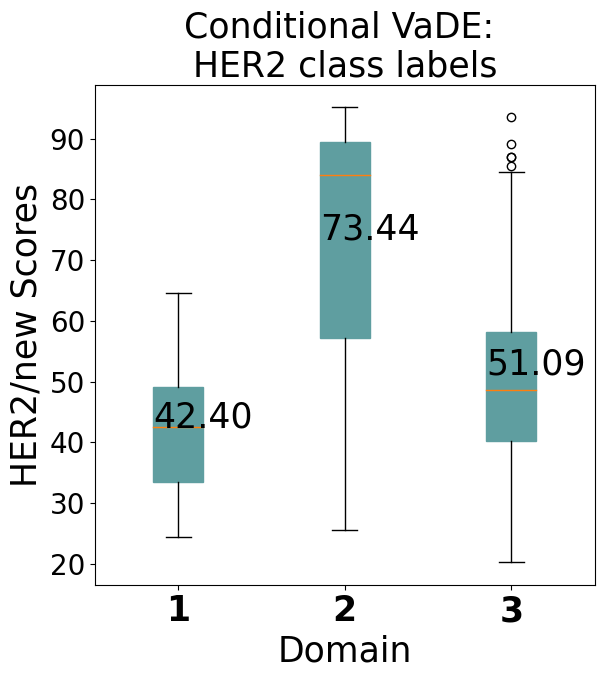

In [21]:
_, _, _, _, domain, *_, img_locs = load_files(ex)
M = mean_scores_per_experiment(scores, img_locs)
box_plot_per_domain(domain, M, 25, "cadetblue", "\nHER2 class labels", False)